# Face Emotion Computer Vision

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [0]:
import tensorflow as tf
import os
import tensorflow_hub as hub
import matplotlib.pyplot as plt

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D
from tensorflow.keras import Model

In [4]:
print("TF version:", tf.__version__)

TF version: 2.1.0


Good now we have the latest TensorFlow Version

In [0]:
import pandas as pd
import numpy as np

Now we have to unzip the file from Google Drive

In [0]:
#!unzip "/content/drive/My Drive/Faces Expression/FacesExpressions.zip" -d "/content/drive/My Drive/Faces Expression"

In [0]:
train = pd.read_csv("drive/My Drive/Faces Expression/train.csv")

In [8]:
train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [9]:
train["emotion"].value_counts()

3    7215
6    4965
4    4830
2    4097
0    3995
5    3171
1     436
Name: emotion, dtype: int64

As we can see there are 7 difgferent emotions:
*  0 = Angry
*  1 = Disgust
*  2 = Fear
*  3 = Happy
*  4 = Sad
*  5 = Surprise
*  6 = Neutral



train.csv contains two columns, "emotion" and "pixels". The "emotion" column contains a numeric code ranging from 0 to 6, inclusive, for the emotion that is present in the image. The "pixels" column contains a string surrounded in quotes for each image. ***The contents of this string a space-separated pixel values in row major order. test.csv contains only the "pixels" column and your task is to predict the emotion column***.The training set consists of 28,709 examples. The public test set used for the leaderboard consists of** 3,589 examples**. The final test set, which was used to determine the winner of the competition, consists of another 3,589 examples.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28709 entries, 0 to 28708
Data columns (total 2 columns):
emotion    28709 non-null int64
pixels     28709 non-null object
dtypes: int64(1), object(1)
memory usage: 448.7+ KB


In [11]:
train.isna().sum()

emotion    0
pixels     0
dtype: int64

In [12]:
train.pixels

0        70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1        151 150 147 155 148 133 111 140 170 174 182 15...
2        231 212 156 164 174 138 161 173 182 200 106 38...
3        24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4        4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
                               ...                        
28704    84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705    114 112 113 113 111 111 112 113 115 113 114 11...
28706    74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707    222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708    195 199 205 206 205 203 206 209 208 210 212 21...
Name: pixels, Length: 28709, dtype: object

In [0]:
test = train[25001:28709]
train2 = train[:25001]

In [0]:
# As we can see the pixels data are in String Format so let's play around and convert to numpy arrays
sentence1 = train.pixels[0].split(" ")

In [0]:
pixels2 = []
pixels3 = []

In [16]:
type(pixels2)

list

In [17]:
test.pixels

25001    204 209 193 187 204 221 179 174 205 200 148 14...
25002    255 255 255 254 252 255 207 118 130 114 93 72 ...
25003    255 255 255 255 255 255 255 255 255 255 255 25...
25004    5 5 6 5 5 6 6 9 17 31 41 42 44 58 72 84 94 99 ...
25005    166 190 242 254 140 64 53 65 70 88 106 110 116...
                               ...                        
28704    84 85 85 85 85 85 85 85 86 86 86 87 86 86 91 9...
28705    114 112 113 113 111 111 112 113 115 113 114 11...
28706    74 81 87 89 95 100 98 93 105 120 127 133 146 1...
28707    222 227 203 90 86 90 84 77 94 87 99 119 134 14...
28708    195 199 205 206 205 203 206 209 208 210 212 21...
Name: pixels, Length: 3708, dtype: object

In [0]:
for i in range (0,len(train2.pixels)): 
  pixels2.append(train2.pixels[i].split(" "))

for i in range (25001,28709): 
  pixels3.append(test.pixels[i].split(" "))

In [19]:
len(pixels2)

25001

In [20]:
len(pixels2[4])

2304

In [0]:
Array = np.asarray(pixels2)
Array2 = np.asarray(pixels3)

In [22]:
Array.shape,Array2.shape

((25001, 2304), (3708, 2304))

In [23]:
print(f"As it was mentionted we have 48*48 = {48*48} pixels")

As it was mentionted we have 48*48 = 2304 pixels


In [24]:
type(Array)

numpy.ndarray

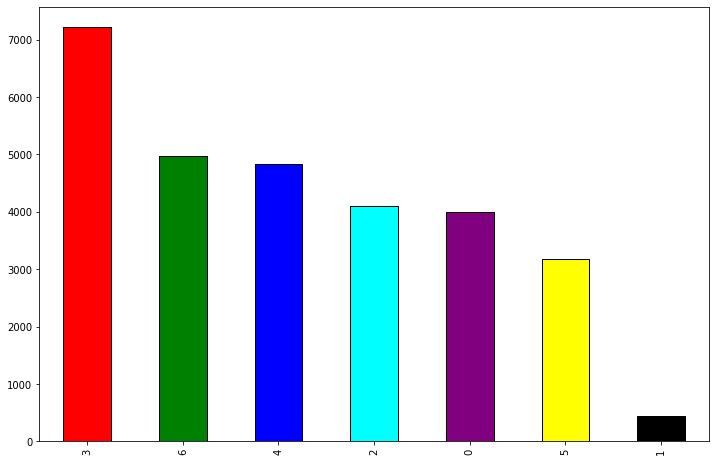

In [25]:
train["emotion"].value_counts().plot.bar(figsize=(12, 8),color=["Red","Green","Blue","Cyan","Purple","Yellow","Black"],edgecolor="Black")

**As we can see there are many Happy faces**

In [0]:
Array = Array.reshape(25001,48,48)
Array2 = Array2.reshape(3708,48,48)

In [27]:
Array.shape

(25001, 48, 48)

In [28]:
print(Array.dtype) 

<U3


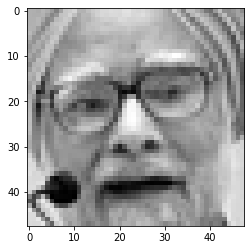

In [29]:
# We must change the type of the numpy array in order to be able to plot it as an image.
 Array = Array.astype('float64')
 Array2 = Array2.astype('float64')
 plt.imshow(Array[1],cmap="gray")

As we can see from the dataframe he is Angry

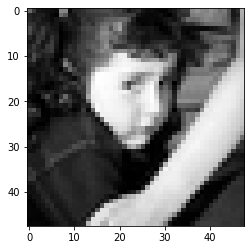

In [30]:
plt.imshow(Array2[167],cmap="gray")

In [0]:
Array = np.expand_dims(Array,axis=3)
Array2 = np.expand_dims(Array2,axis=3)

In [32]:
Array.shape

(25001, 48, 48, 1)

In [0]:
X_train = tf.constant(Array.astype("float64"))
X_test = tf.constant(Array2.astype("float64"))

In [0]:
X_train = X_train/255.0
X_test = X_test/255.0
y_train = tf.constant(train2["emotion"].astype("float64"))
y_test = tf.constant(test["emotion"].astype("float64"))

In [0]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(10000).batch(32)
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test)).shuffle(10000).batch(32)

In [0]:
class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.conv1 = Conv2D(32, 3, activation='relu')
    self.pool1 = MaxPool2D()
    self.conv2 = Conv2D(64, 3, activation='relu')
    self.pool2 = MaxPool2D()
    self.conv3 = Conv2D(64, 3, activation='relu')
    self.pool3 = MaxPool2D()
    self.flatten = Flatten()
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(7)

  def call(self, x):
    x = self.conv1(x)
    x = self.pool1(x)
    x = self.conv2(x)
    x = self.pool2(x)
    x = self.conv3(x)
    x = self.pool3(x)
    x = self.flatten(x)
    x = self.d1(x)
    return self.d2(x)

# Create an instance of the model
model = MyModel()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = tf.keras.optimizers.Adam()

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')
test_loss = tf.keras.metrics.Mean(name='train_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    # training=True is only needed if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    predictions = model(images, training=True)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

In [0]:
@tf.function
def test_step(images, labels):
  # training=False is only needed if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  predictions = model(images, training=False)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [41]:
tf.keras.backend.set_floatx('float64')
EPOCHS = 100 #@param {type:"slider", min:10, max:200, step:5}
Accuracy = []
TestAccuracy = []
for epoch in range(EPOCHS):
  # Reset the metrics at the start of the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
  Accuracy.append(train_accuracy.result()*100)
  TestAccuracy.append(test_accuracy.result()*100)



If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 1, Loss: 1.6527457237243652, Accuracy: 34.40662384033203, Test Loss: 1.4807345867156982, Test Accuracy: 43.90507125854492
Epoch 2, Loss: 1.4077739715576172, Accuracy: 46.006160736083984, Test Loss: 1.3565442562103271, Test Accuracy: 47.54584884643555
Epoch 3, Loss: 1.2918390035629272, Accuracy: 50.989959716796875, Test Loss: 1.2876070737838745, Test Accuracy: 51.699031829833984
Epoch 4, Loss: 1.2188905477523804, Accuracy: 53.88184356689453, Test Loss: 1.223616123199463, Test Accuracy: 53.182308197

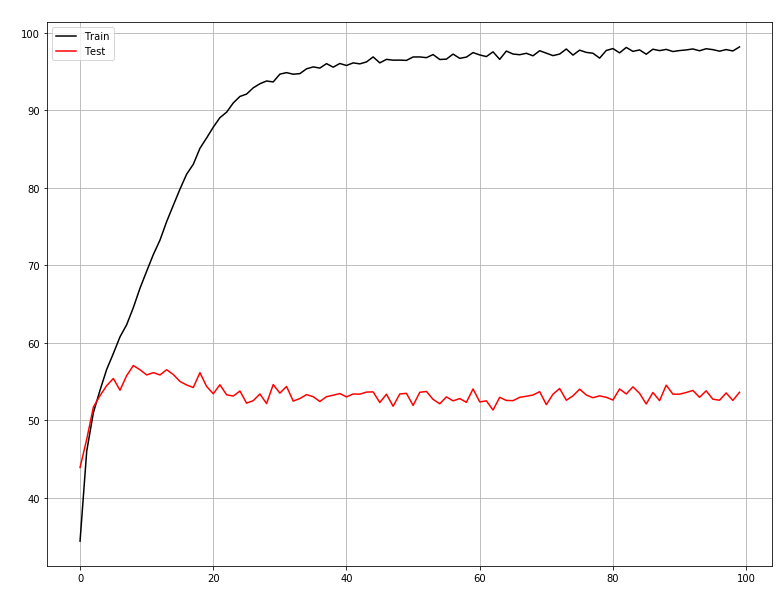

In [43]:
fig, ax= plt.subplots(figsize=(13,10))
ax.plot(Accuracy,color="Black")
ax.plot(TestAccuracy,color="Red")
ax.grid(True)
plt.xlabel("Epochs",color="White")
plt.ylabel("Accuracy",color="White")
plt.legend(["Train","Test"])
plt.title(f"Best Achievd Accuracy is {train_accuracy.result()*100:.2f}%",color="White")
plt.show()